In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [468]:
data = pd.read_csv('day.csv')

In [470]:
data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [472]:
cname = ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday','workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
result = [i for i in data.columns if i not in cname]
print("Столбцы соответствуют" if len(cname) == len(data.columns) and len(result) == 0 else "Столбцы не соответствуют")

Столбцы соответствуют


In [474]:
missed = data.columns.isna().sum().sum() == 0
print("Пропущенных значений в наименовании столбцов нет" if missed == True else "Пропущеные значения в наименовании столбцов есть")

Пропущенных значений в наименовании столбцов нет


In [476]:
wdays = 0
hdays = 0
for index, row in data.iterrows():
    if row.workingday == 1:
        wdays+=row.cnt
    elif row.workingday == 0:
        hdays+=row.cnt
    else:
        print("Ошибка")
print(f'Количество велосипедов арендованных:\nв будние дни - {wdays:,d}\nв выходные, включая праздники - {hdays: ,d}')

Количество велосипедов арендованных:
в будние дни - 2,292,410
в выходные, включая праздники -  1,000,269


In [117]:
pd.get_dummies(data.season, dtype=int).head(2)

,1,2,3,4
0,1,0,0,0
1,1,0,0,0


In [119]:
pd.get_dummies(data.yr, dtype=int).head(2)

,0,1
0,1,0
1,1,0


In [121]:
pd.get_dummies(data.mnth, dtype=int).head(2)

,1,2,3,4,5,6,7,8,9,10,11,12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0


In [123]:
pd.get_dummies(data.holiday, dtype=int).head(2)

,0,1
0,1,0
1,1,0


In [125]:
pd.get_dummies(data.weekday, dtype=int).head(2)

,0,1,2,3,4,5,6
0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0


In [127]:
pd.get_dummies(data.workingday, dtype=int).head(2)

,0,1
0,1,0
1,1,0


In [131]:
pd.get_dummies(data.weathersit, dtype=int).head(2)

,1,2,3
0,0,1,0
1,0,1,0


In [480]:
data.groupby(data.mnth, as_index=False)['cnt'].mean()

,mnth,cnt
0,1,2176.338710
1,2,2655.298246
2,3,3692.258065
3,4,4484.900000
4,5,5349.774194
5,6,5772.366667
6,7,5563.677419
7,8,5664.419355
8,9,5766.516667
9,10,5199.225806


In [482]:
missed = data.isna().sum().sum() == 0
print("Пропущенных значений нет" if missed == True else f"Пропущеные значения есть, они удалены{data.dropna()}")

Пропущенных значений нет


In [484]:
data2 = pd.read_csv('hour.csv')

In [562]:
data3 = data2.groupby(data2.hr, as_index=False)['cnt'].sum()
data3

,hr,cnt
0,0,39130
1,1,24164
2,2,16352
3,3,8174
4,4,4428
5,5,14261
6,6,55132
7,7,154171
8,8,261001
9,9,159438


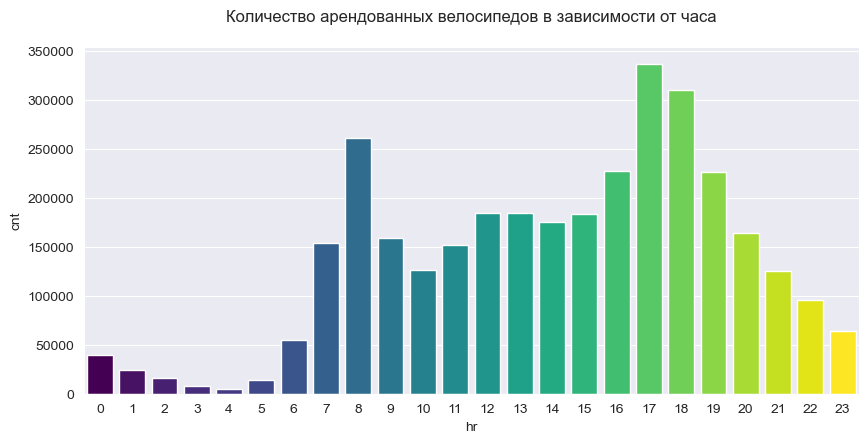

In [566]:
fig, ax = plt.subplots(figsize=(10, 4.5))
ax = sns.barplot(x='hr', y='cnt', data=data3, hue='hr',
                 errorbar=None, palette="viridis", saturation=2).set(title="Количество арендованных велосипедов в зависимости от часа\n")
plt.legend([],[],frameon=False)
plt.show()